In [11]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import os
import pandas as pd


def plot(
    algorithm,
    metric=None,
    *,
    samples=15000,
    scores=None,
    saved_runs=None,
    save_fig=False,
    transparent=False,
    **kwargs,
):

    saved_runs_means = saved_runs
    scores_means = scores
    plt.figure(figsize=(18, 9))

    # Find the vertical line where saved runs become negative
    negative_indices = [
        i for i, saved_run in enumerate(saved_runs_means) if saved_run < 0
    ]

    if negative_indices:
        negative_index = negative_indices[
            -1
        ]  # Find the last index where saved runs are negative
        # Perform linear interpolation
        x1 = scores_means[negative_index]
        y1 = saved_runs_means[negative_index]
        x2 = scores_means[negative_index + 1]
        y2 = saved_runs_means[negative_index + 1]

        x_zero_cross = x1 + (0 - y1) / (y2 - y1) * (x2 - x1)

        plt.axvline(
            x=x_zero_cross,
            color="#EC6602",
            linestyle="--",
            linewidth=1.5,
            label="_nolegend_",
        )
        plt.axhline(
            y=0,
            color="#EC6602",
            linestyle="--",
            linewidth=1.5,
            label="_nolegend_",
        )
        x_zero_cross = f"{x_zero_cross:.4f}"
        plt.axhline(y=0, color="#EC6602", linestyle="--", linewidth=1.5)

    else:
        x_zero_cross = None

    plt.legend(
        [f"Samples: {samples}\nThreshold: {x_zero_cross}"],
        loc="upper right",
        fontsize=10,
        frameon=False,
        shadow=False,
        title="Info",
        title_fontsize="20",
    )
    # plt.title('Saved Runs Vs Model Scores using Hit Or Miss Algorithm', fontsize=20)
    if metric == "Weighted Binary Crossentropy Loss":
        plt.xlabel(f"Loss Values ({metric})", fontsize=25)
    else:
        plt.xlabel(f"Score Values ({metric})", fontsize=25)
    plt.ylabel("Saved Runs", fontsize=25)

    ax = plt.gca()

    plt.grid(True)

    ax.yaxis.set_major_locator(MaxNLocator(nbins=25))
    ax.xaxis.set_major_locator(MaxNLocator(nbins=13))

    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    # Remove borders
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)

    # plt.ylim(-16, 0.90)
    # plt.xlim(0, 1)
    plt.plot(
        scores_means,
        saved_runs_means,
        marker="o",
        linestyle="--",
        color="#009999",
        label="_nolegend_",
        linewidth=2,
        **kwargs,
    )

    if save_fig:
        if transparent:
            transparency = "transparent"
        else:
            transparency = "non-transparent"

        directory = "Graphs/"

        if not os.path.exists(directory):
            os.makedirs(directory)

        plt.savefig(
            os.path.join(directory, f"{algorithm}_{transparency}_{metric}.png"),
            transparent=transparent,
            dpi=350,
        )

    plt.show

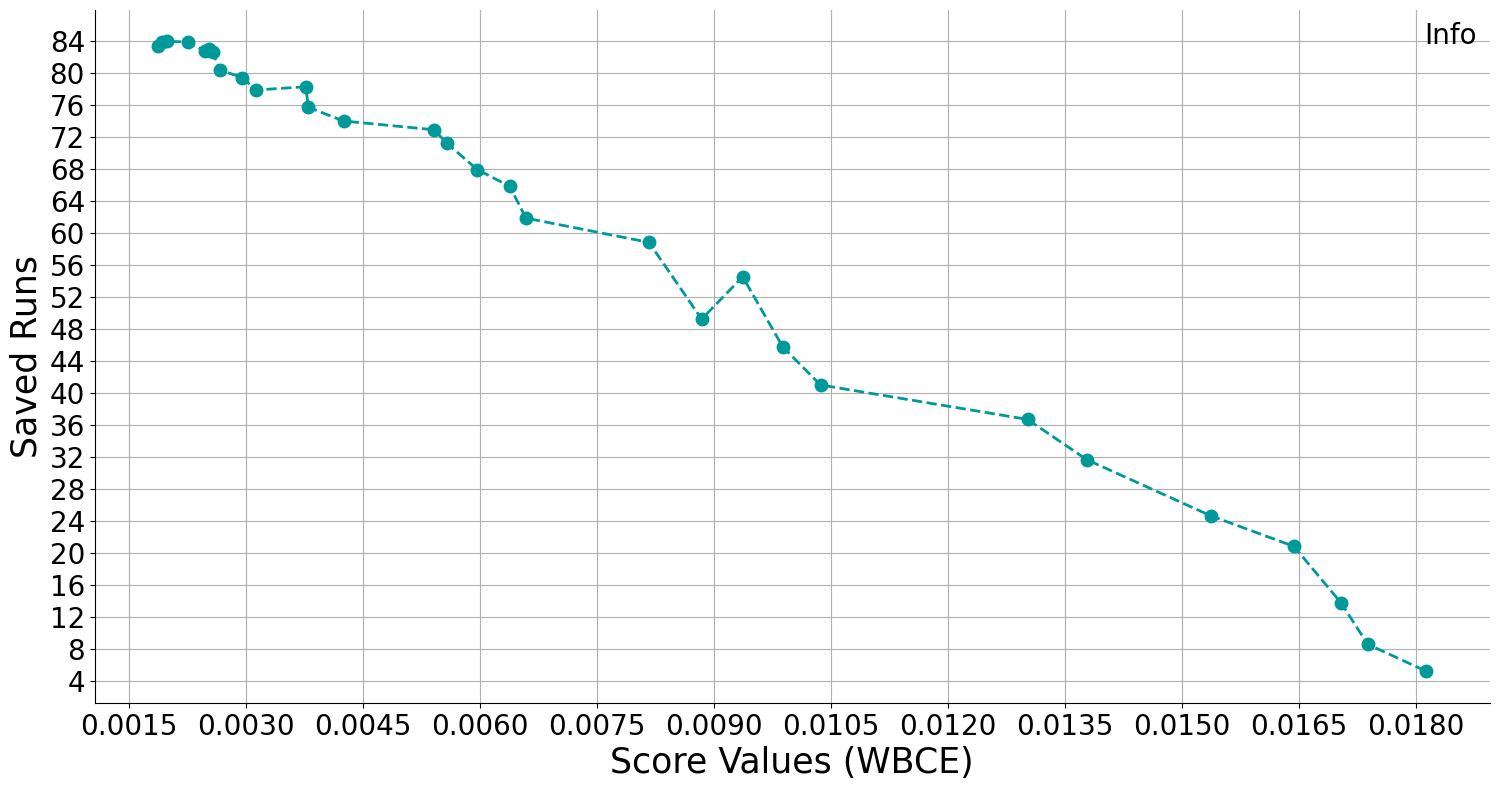

In [17]:
data = pd.read_csv("results/equilibrium_weighted_binary_cross_entropy_plot.csv")
data = data.sort_values("score_avg")
plot(
    algorithm="Equilibrium",
    metric="WBCE",
    # metric='Harmonic TNR Recall',
    samples=70000,
    scores=list(data["score_avg"]),
    saved_runs=list(data["saved_runs_avg"] * 100),
    save_fig=True,
    transparent=True,
    markersize=9,
)

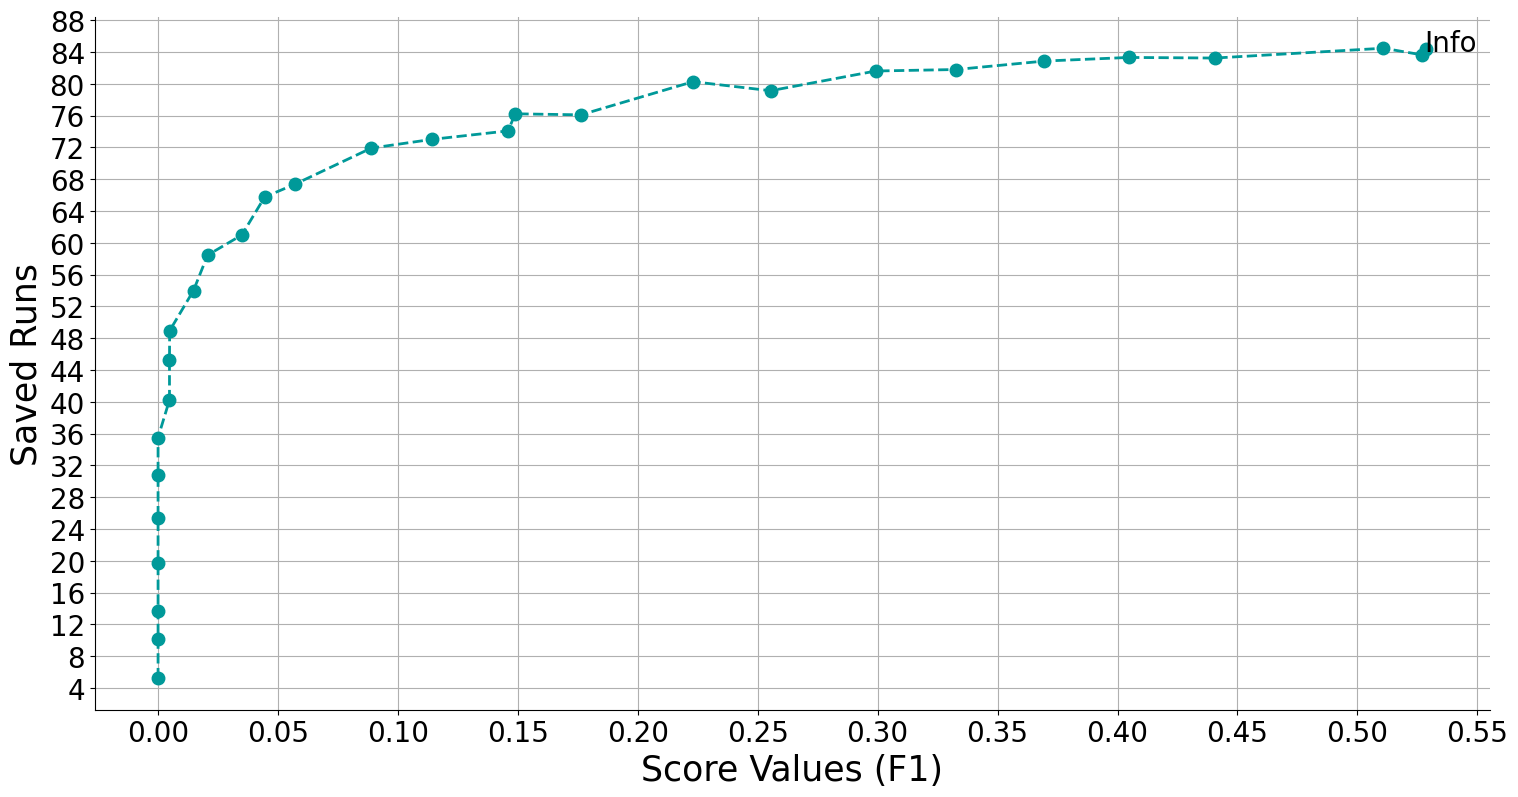

In [15]:
data = pd.read_csv(
    "results/equilibrium_f1_plot.csv")
data = data.sort_values("score_avg")
plot(
    algorithm="Equilibrium",
    metric="F1",
    # metric='Harmonic TNR Recall',
    samples=70000,
    scores=list(data["score_avg"]),
    saved_runs=list(data["saved_runs_avg"] * 100),
    save_fig=True,
    transparent=True,
    markersize=9,
)

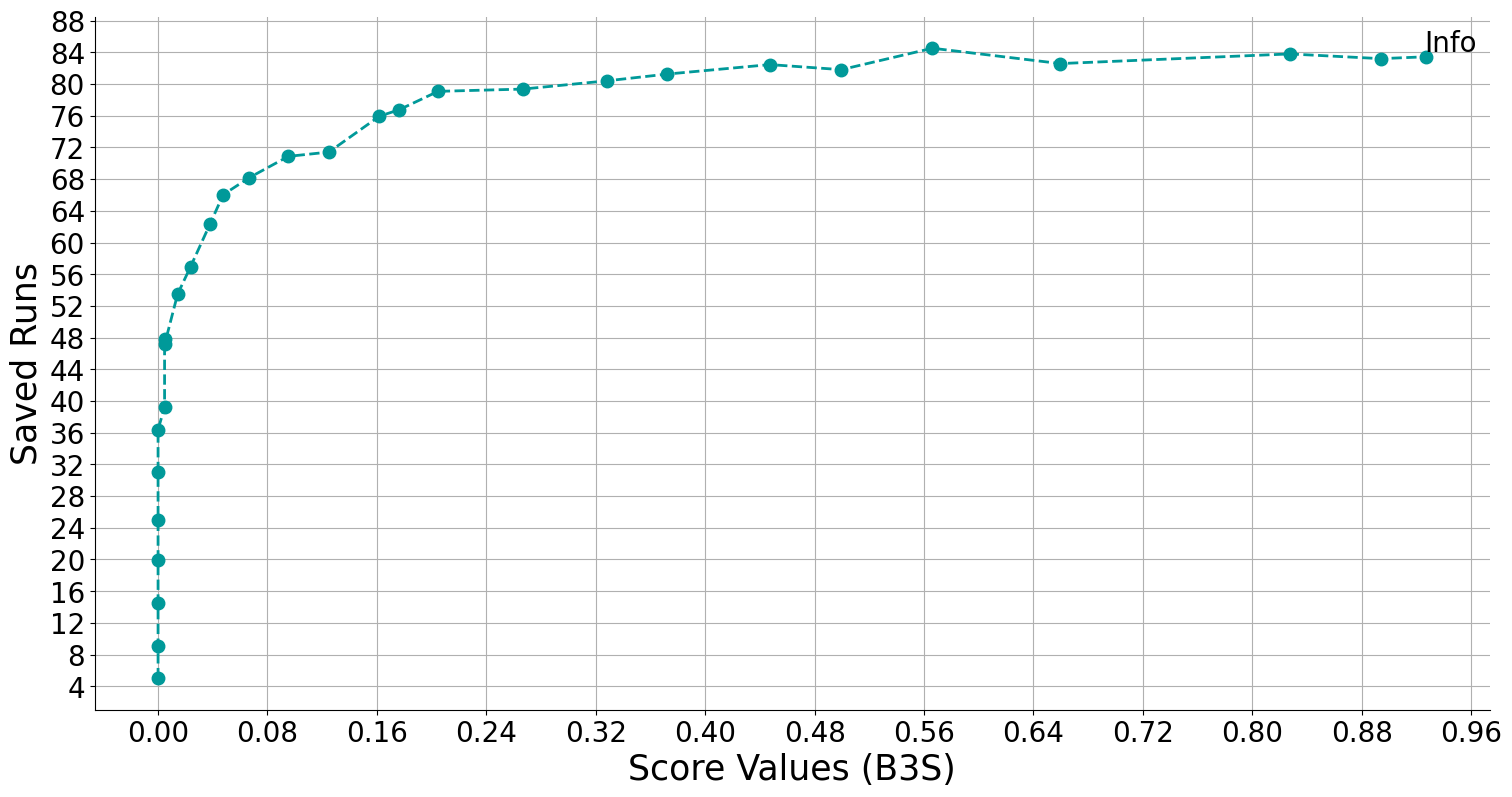

In [16]:
data = pd.read_csv(
    "results/equilibrium_harmonic_tnr_recall_plot.csv")
data = data.sort_values("score_avg")
plot(
    algorithm="Equilibrium",
    metric="B3S",
    # metric='Harmonic TNR Recall',
    samples=70000,
    scores=list(data["score_avg"]),
    saved_runs=list(data["saved_runs_avg"] * 100),
    save_fig=True,
    transparent=True,
    markersize=9,
)